# Exploratory Data Analysis on Dataset-Terrorism

# Importing libraries required

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing and observing the data

The data string is of latin1 encoding instead of UTF-8 encoding

In [ ]:
data= pd.read_csv("global terrorism.csv", encoding= "latin1")
df = pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 135 entries, eventid to related
dtypes: float64(67), int64(17), object(51)
memory usage: 3.0+ MB


In [ ]:
df.shape

(2917, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
    print(i , end = ", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# Cleaning the data

In [ ]:
df = df[["iyear", "imonth" ,"iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            2917 non-null   int64  
 1   Month           2917 non-null   int64  
 2   Day             2917 non-null   int64  
 3   Country         2917 non-null   object 
 4   Region          2917 non-null   object 
 5   Province/State  2907 non-null   object 
 6   City            2917 non-null   object 
 7   Latitude        2869 non-null   float64
 8   Longitude       2869 non-null   float64
 9   Location        461 non-null    object 
 10  Summary         721 non-null    object 
 11  Attack Type     2917 non-null   object 
 12  Target Type     2917 non-null   object 
 13  Group Name      2916 non-null   object 
 14  Motive          460 non-null    object 
 15  Weapon Type     2916 non-null   object 
 16  Killed          2610 non-null   float64
 17  Wounded         1852 non-null   f

In [ ]:
df.shape

(2917, 19)

In [ ]:
df.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
Province/State      10
City                 0
Latitude            48
Longitude           48
Location          2456
Summary           2196
Attack Type          0
Target Type          0
Group Name           1
Motive            2457
Weapon Type          1
Killed             307
Wounded           1065
Add Notes         2400
dtype: int64

In [ ]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [ ]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,2917.000000,2917.000000,2917.000000,2869.000000,2869.000000,2917.000000,2917.000000,2917.000000
mean,1972.130614,6.129928,15.420638,35.685756,-35.463317,0.661639,0.777168,1.438807
std,1.590787,3.420554,9.111993,24.626973,53.617139,3.050053,7.213840,8.374186
min,1970.000000,0.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000,0.000000
25%,1971.000000,3.000000,7.000000,34.097866,-75.142561,0.000000,0.000000,0.000000
50%,1972.000000,6.000000,16.000000,40.697132,-7.312045,0.000000,0.000000,0.000000
75%,1974.000000,9.000000,23.000000,54.183052,-1.977903,1.000000,0.000000,1.000000
max,1975.000000,12.000000,31.000000,59.332788,172.636225,88.000000,238.000000,239.000000


# Observation

1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum number of people wounded in an event were: 8191
4. Maximum number of total casualties in an event were: 9574


# Visualizing the data

1. Year wise attacks

1. Number of attacks in each year

In [ ]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


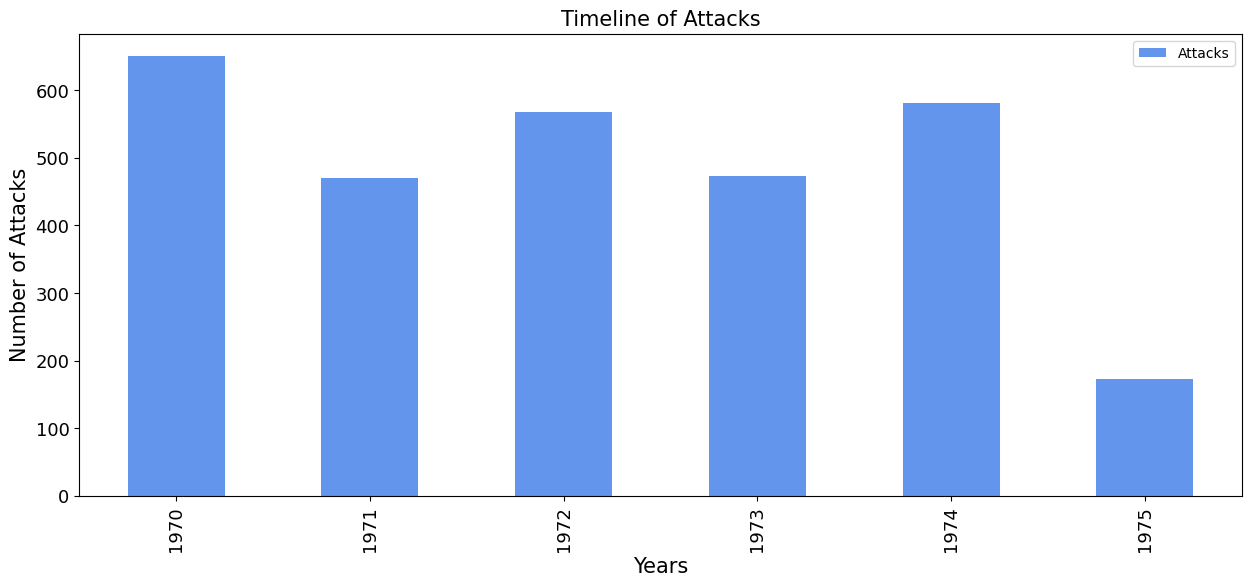

In [ ]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(i). Most number of attacks(16903) in 2014  
(ii). Least number of attacks(471) in 1971

2. Total Casualties (Killed + Wounded) in each Year


In [ ]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


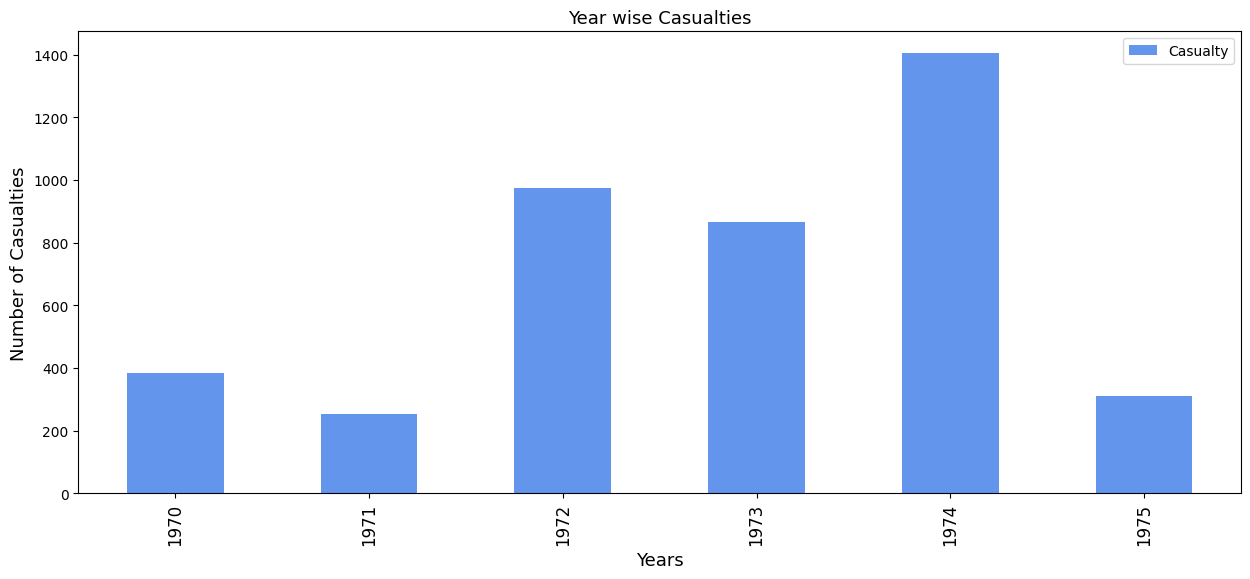

In [ ]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. killed in each year

In [ ]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


4. Wounded in each Region

In [ ]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


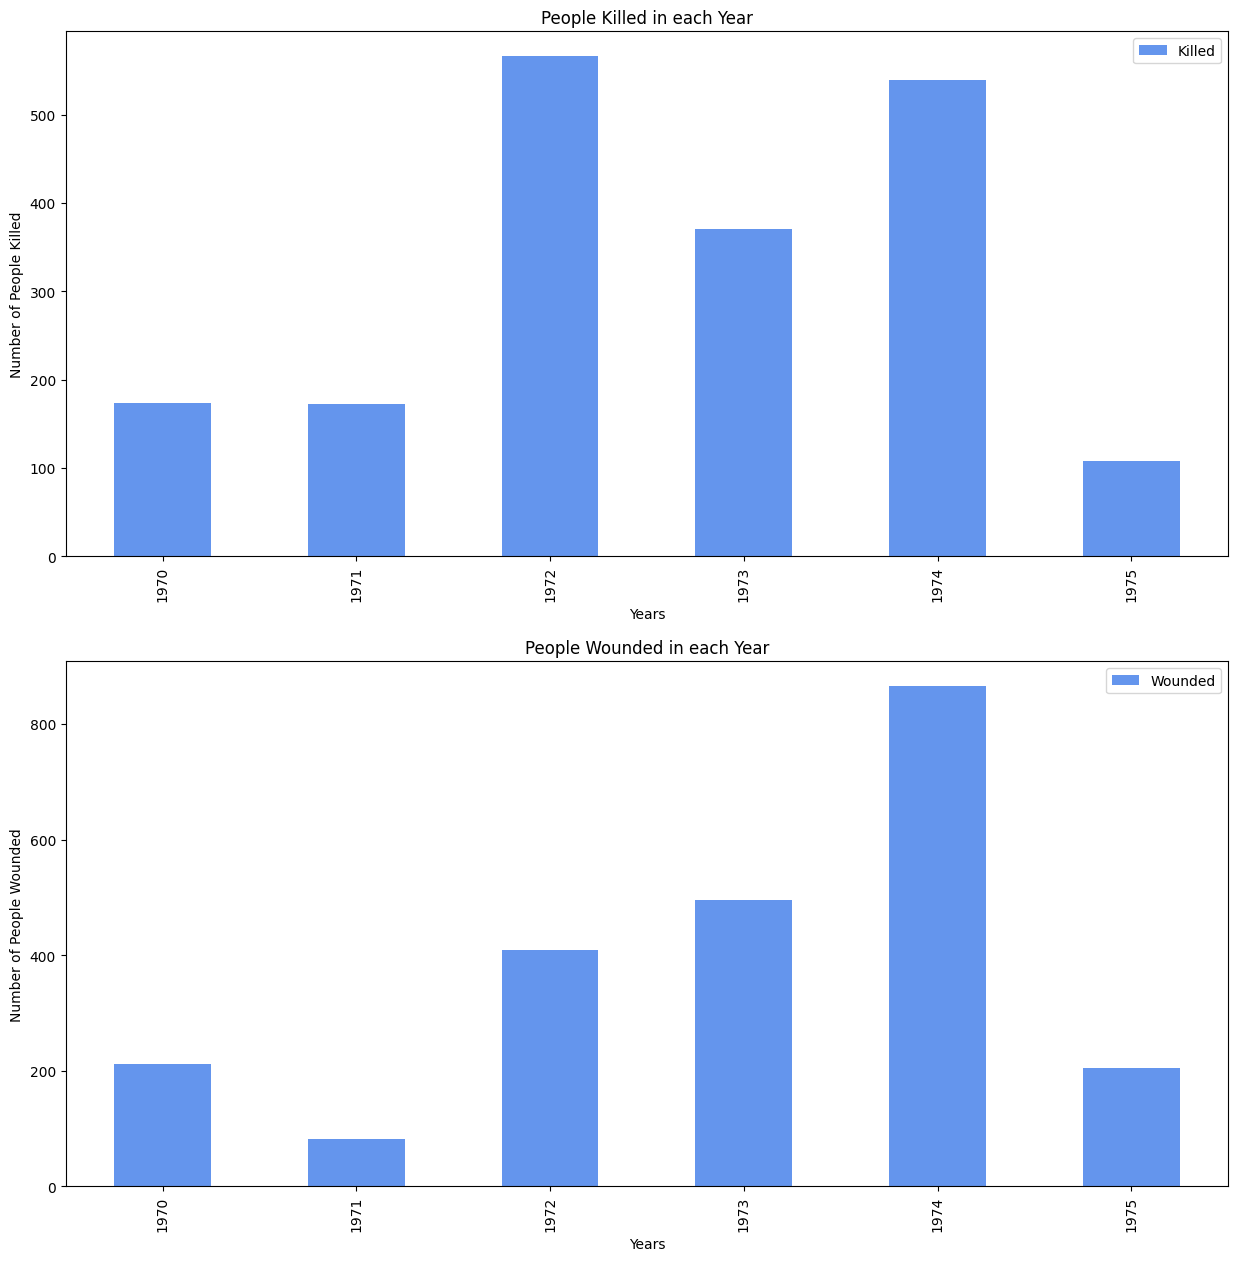

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# 2. Region wise Attacks

1. Distribution of Terrorist Attacks over Regions from 1970-2017

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


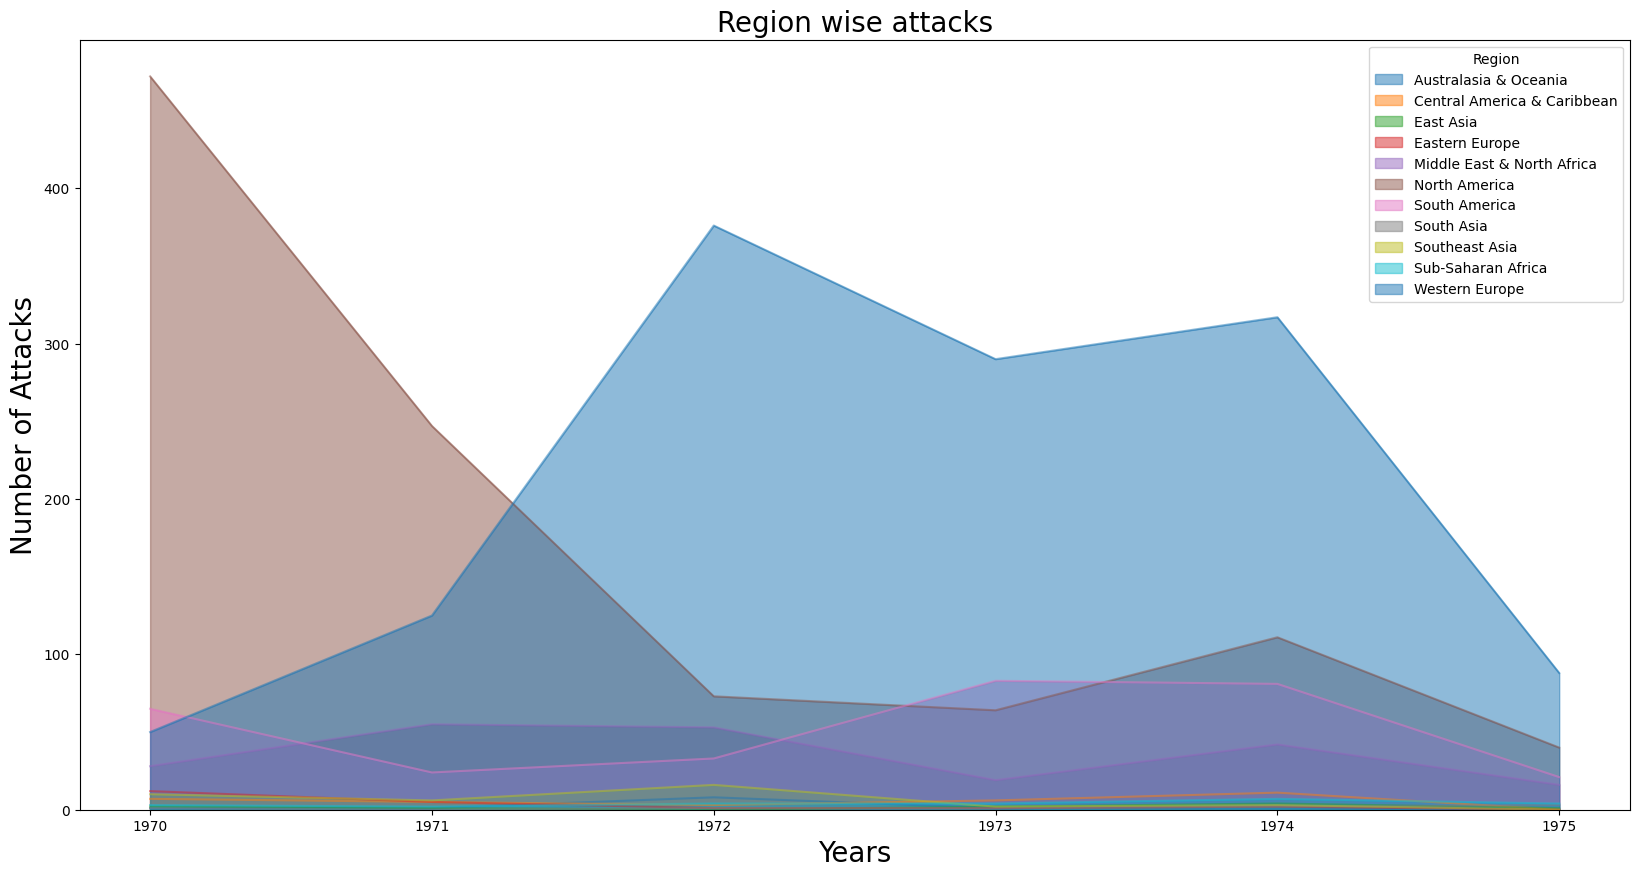

In [ ]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

2. Total Terrorist Attacks in each Region from 1970-2017

In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Western Europe                 1246
North America                  1007
South America                   307
Middle East & North Africa      213
Southeast Asia                   37
Central America & Caribbean      32
Sub-Saharan Africa               24
Eastern Europe                   21
Australasia & Oceania            12
East Asia                        10
South Asia                        8
Name: Total, dtype: int64

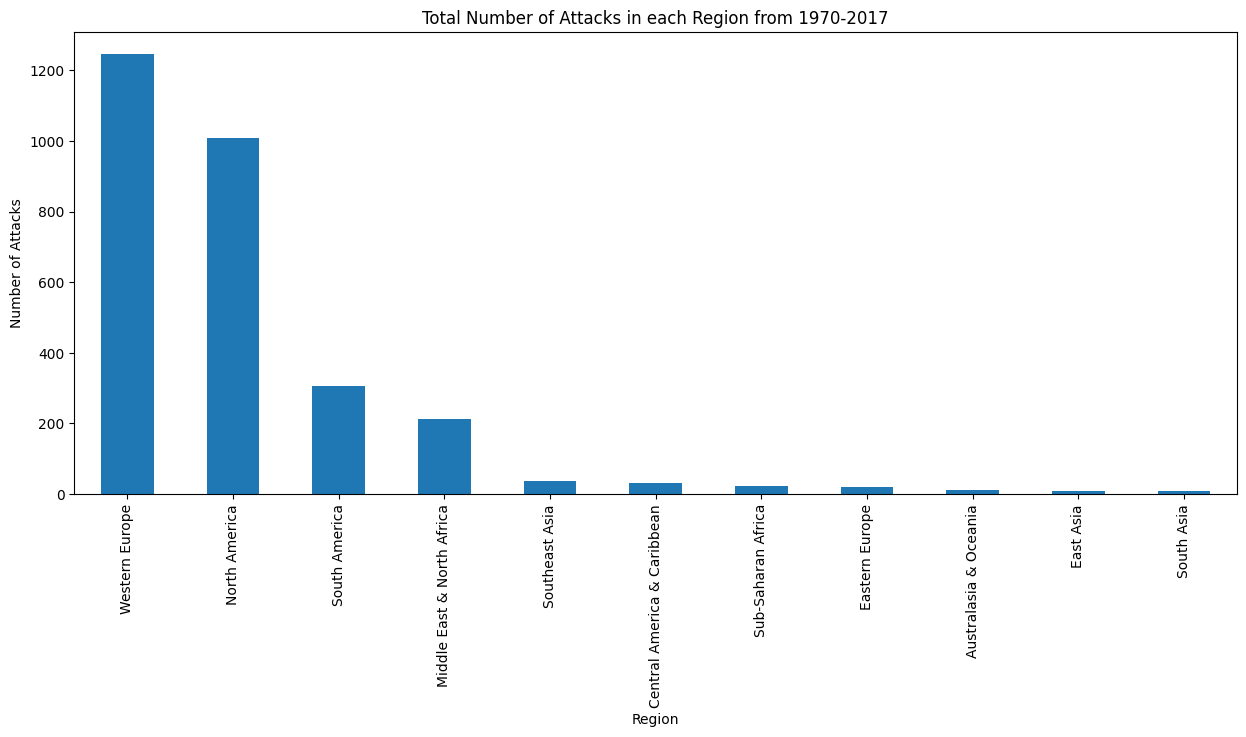

In [ ]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

3. Total Casualties (Killed + Wounded) in each Region

In [ ]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Western Europe,2679.0
North America,549.0
Middle East & North Africa,437.0
Southeast Asia,164.0
Sub-Saharan Africa,142.0
South America,119.0
Eastern Europe,35.0
East Asia,33.0
South Asia,32.0


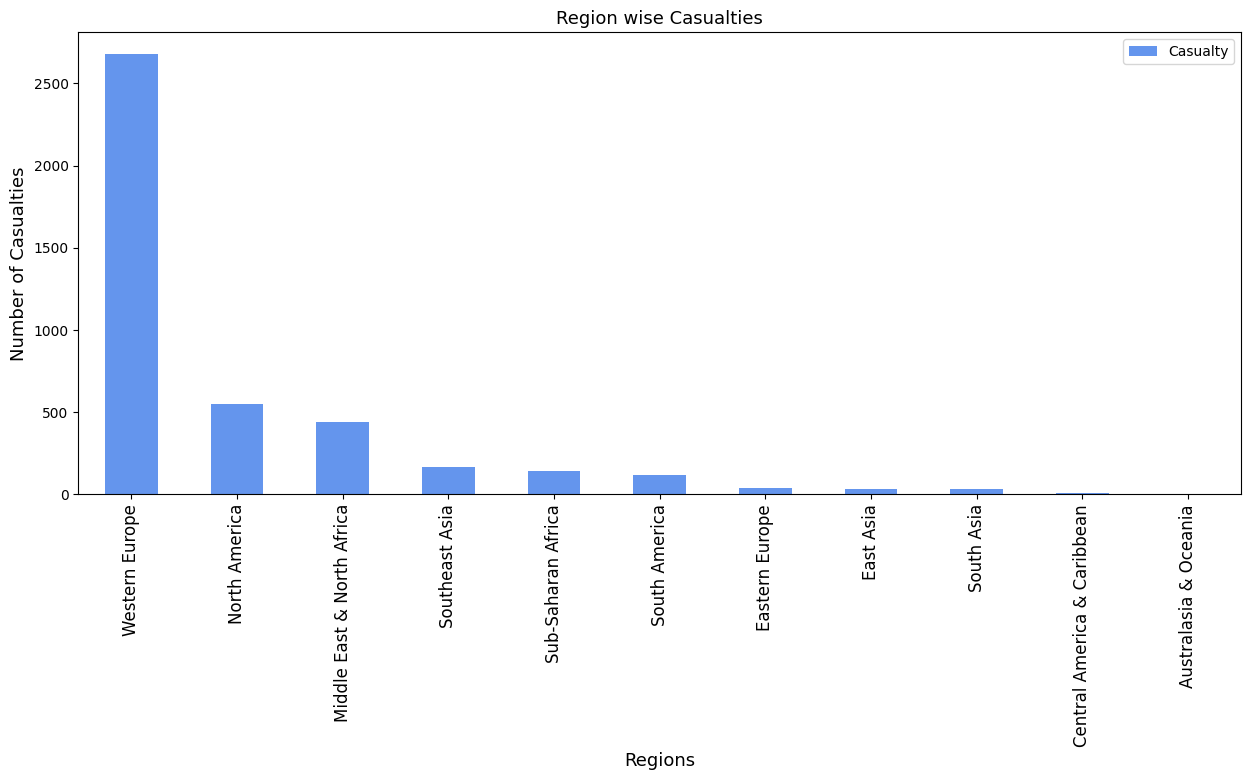

In [ ]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

4. Killed in each Region

In [ ]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Western Europe,1339.0
Middle East & North Africa,150.0
North America,137.0
Southeast Asia,132.0
South America,66.0
Sub-Saharan Africa,39.0
Eastern Europe,28.0
East Asia,26.0
South Asia,9.0


In [ ]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Western Europe,1340.0
North America,412.0
Middle East & North Africa,287.0
Sub-Saharan Africa,103.0
South America,53.0
Southeast Asia,32.0
South Asia,23.0
East Asia,7.0
Eastern Europe,7.0


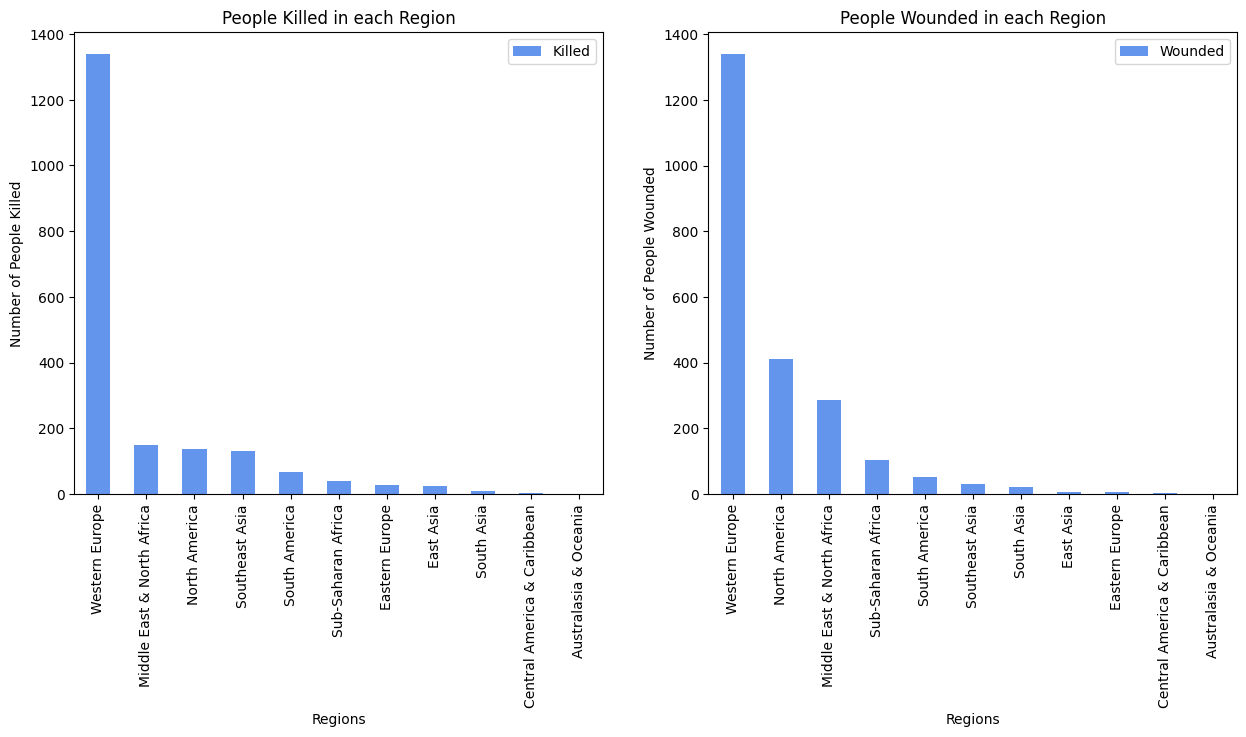

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# 5. Terrorist Group wise Attacks - Top 10

1. Number of Attacks by each Group

In [ ]:
grp=df["Group Name"].value_counts()[1:10]
grp

Irish Republican Army (IRA)                             463
Left-Wing Militants                                     169
Protestant extremists                                   119
Black September                                         119
Ulster Volunteer Force (UVF)                             91
Black Nationalists                                       82
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)     76
Student Radicals                                         71
Ulster Freedom Fighters (UFF)                            59
Name: Group Name, dtype: int64

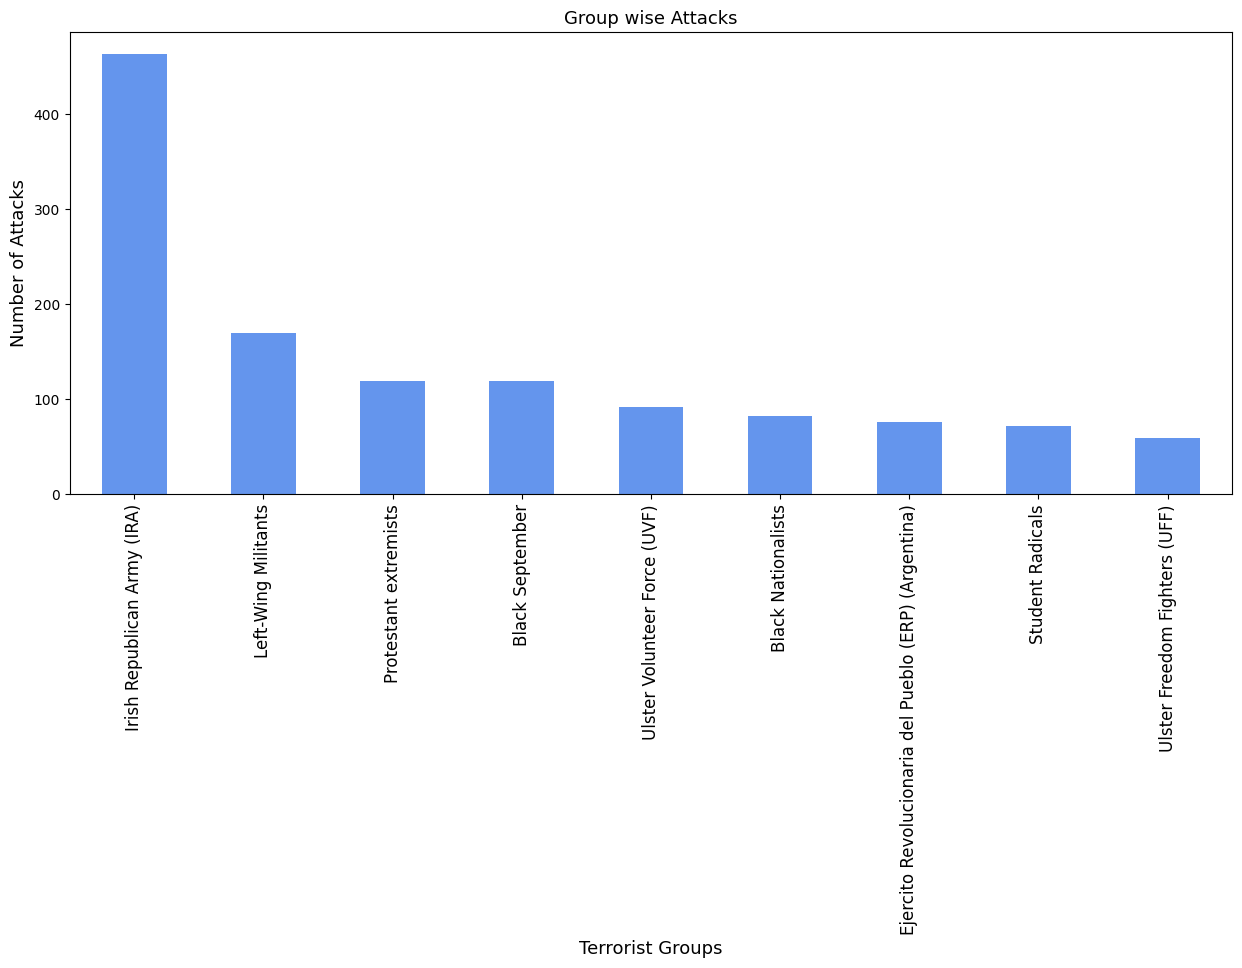

In [ ]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties(Killed + Wounded) by each Group

In [ ]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
Group Name,
Irish Republican Army (IRA),1344.0
Black September,199.0
Black Order,170.0
Popular Front for the Liberation of Palestine (PFLP),165.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",156.0
Ulster Volunteer Force (UVF),156.0
Protestant extremists,131.0
Maskini Liberation Front,127.0
Democratic Front for the Liberation of Palestine (DFLP),120.0


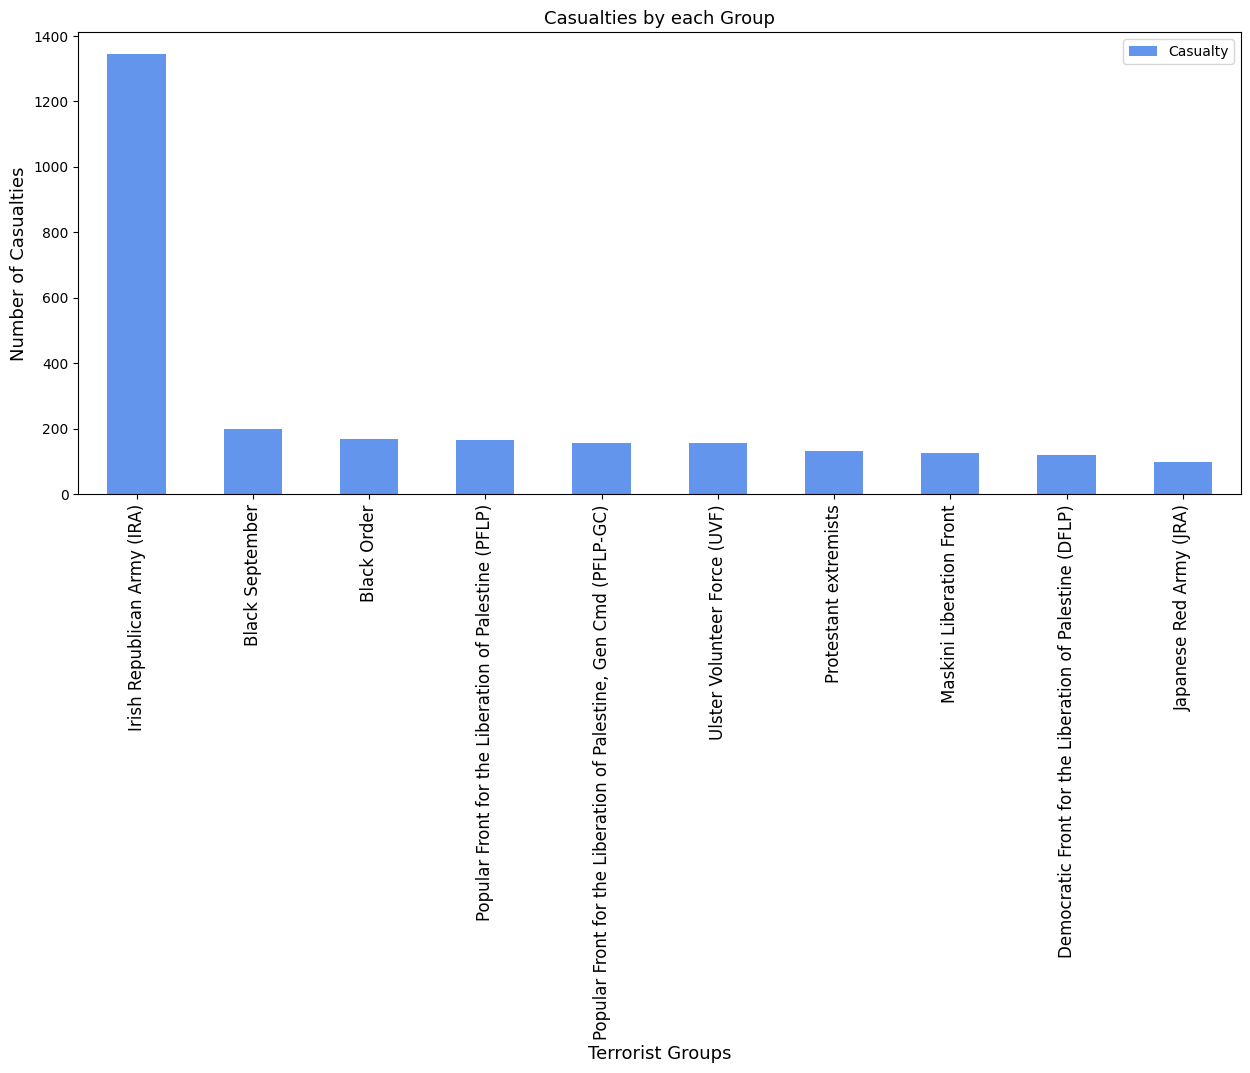

In [ ]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed by each Group

In [ ]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Irish Republican Army (IRA),582.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",156.0
Ulster Volunteer Force (UVF),155.0
Protestant extremists,131.0
Black September,77.0
Ulster Freedom Fighters (UFF),67.0
Popular Front for the Liberation of Palestine (PFLP),42.0
Irish Republican Extremists,34.0
Official Irish Republican Army (OIRA),34.0


4. Wounded by each Group

In [ ]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),762.0
Black Order,150.0
Popular Front for the Liberation of Palestine (PFLP),123.0
Black September,122.0
Maskini Liberation Front,100.0
Democratic Front for the Liberation of Palestine (DFLP),88.0
Japanese Red Army (JRA),72.0
Basque Fatherland and Freedom (ETA),71.0
Black Panthers,68.0


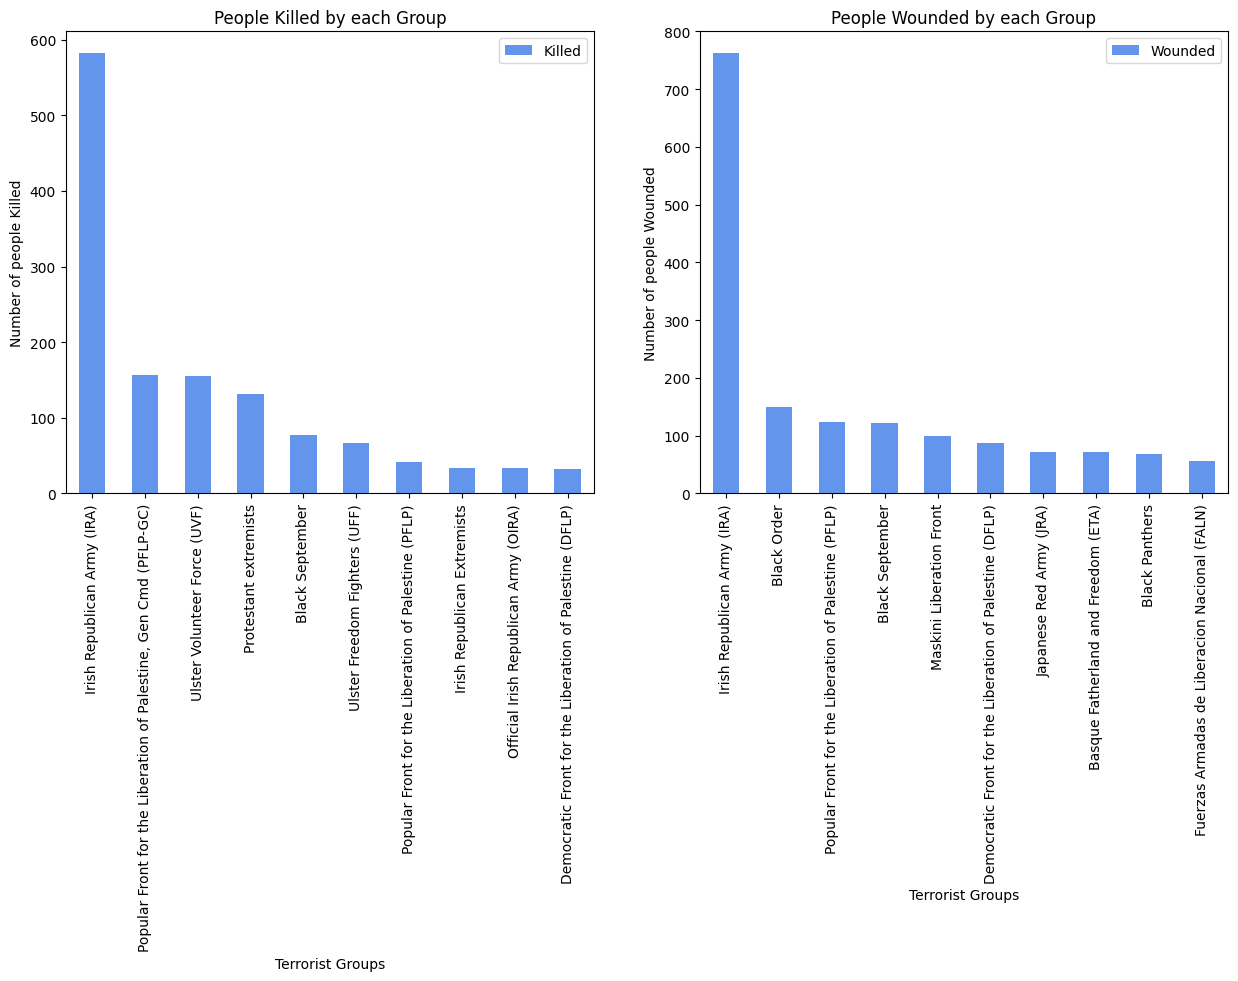

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# 6. Attack Type wise Attacks

1.Number of Attacks by each Attack Type

In [ ]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      1298
Assassination                           713
Facility/Infrastructure Attack          370
Armed Assault                           294
Hostage Taking (Kidnapping)             157
Hijacking                                41
Hostage Taking (Barricade Incident)      22
Unknown                                  12
Unarmed Assault                          10
Name: Attack Type, dtype: int64

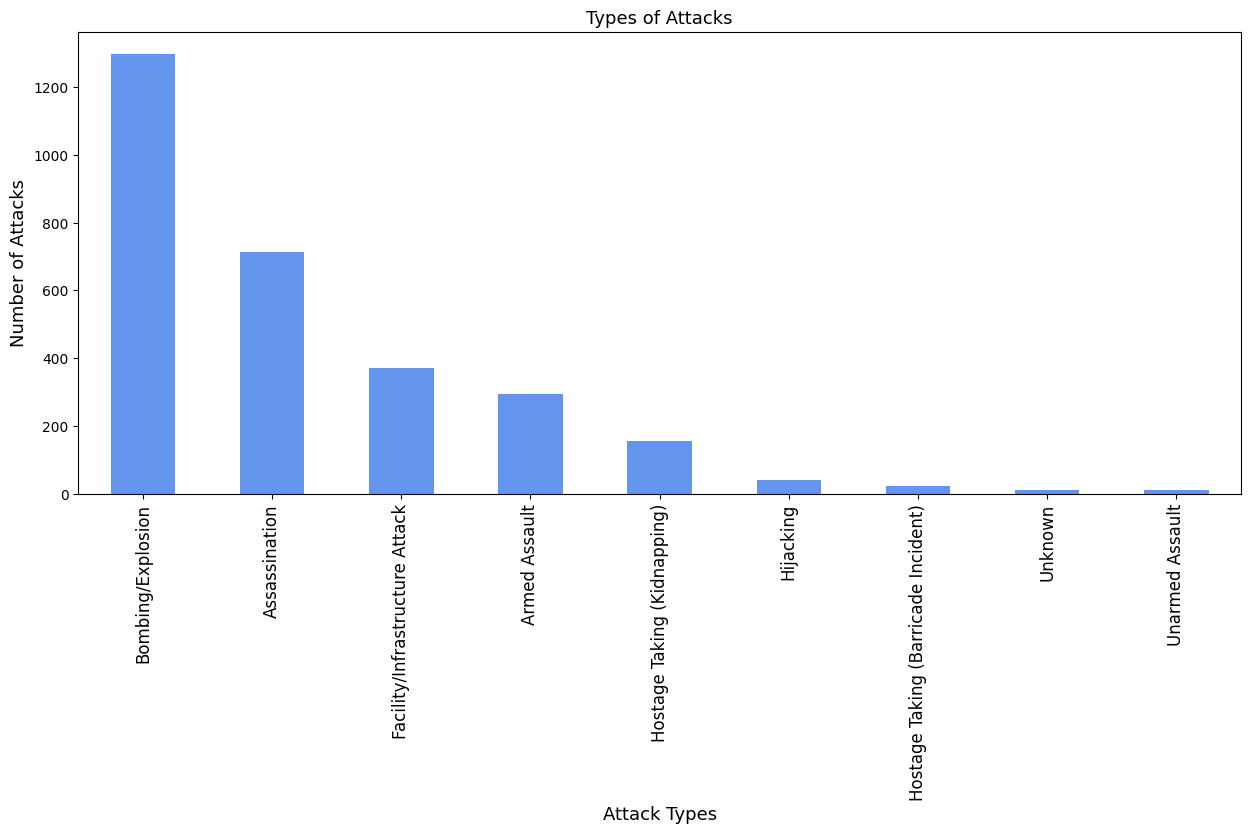

In [ ]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

 2. Total Casualties (Killed + Wounded) by each Attack Type

In [ ]:
ac=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
Attack Type,
Bombing/Explosion,2774.0
Assassination,735.0
Armed Assault,288.0
Hostage Taking (Barricade Incident),165.0
Facility/Infrastructure Attack,91.0
Hostage Taking (Kidnapping),60.0
Hijacking,53.0
Unknown,24.0
Unarmed Assault,7.0


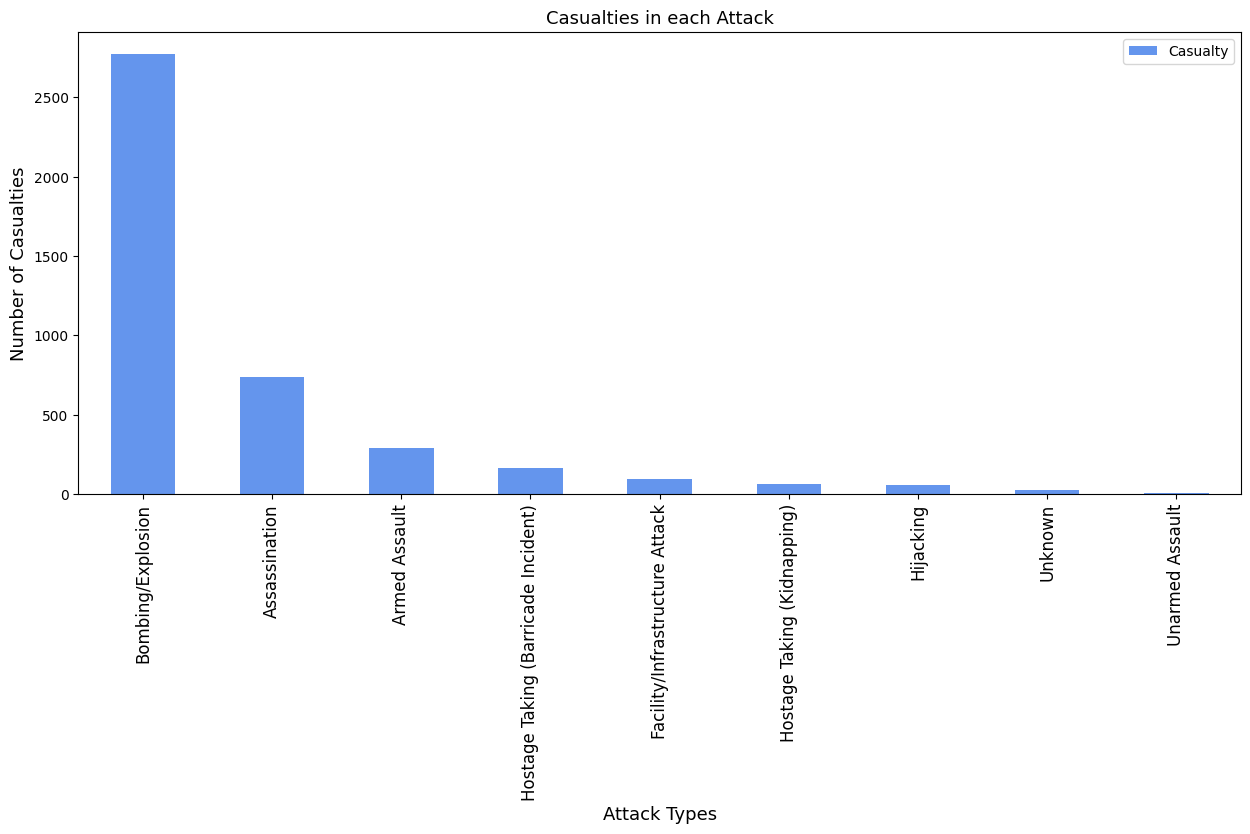

In [ ]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed by each Attack Type

In [ ]:
ak=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
Attack Type,
Bombing/Explosion,865.0
Assassination,662.0
Armed Assault,193.0
Hostage Taking (Barricade Incident),91.0
Hostage Taking (Kidnapping),50.0
Hijacking,41.0
Unknown,16.0
Facility/Infrastructure Attack,11.0
Unarmed Assault,1.0


4. Wounded by each Attack Type

In [ ]:
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,1909.0
Armed Assault,95.0
Facility/Infrastructure Attack,80.0
Hostage Taking (Barricade Incident),74.0
Assassination,73.0
Hijacking,12.0
Hostage Taking (Kidnapping),10.0
Unknown,8.0
Unarmed Assault,6.0


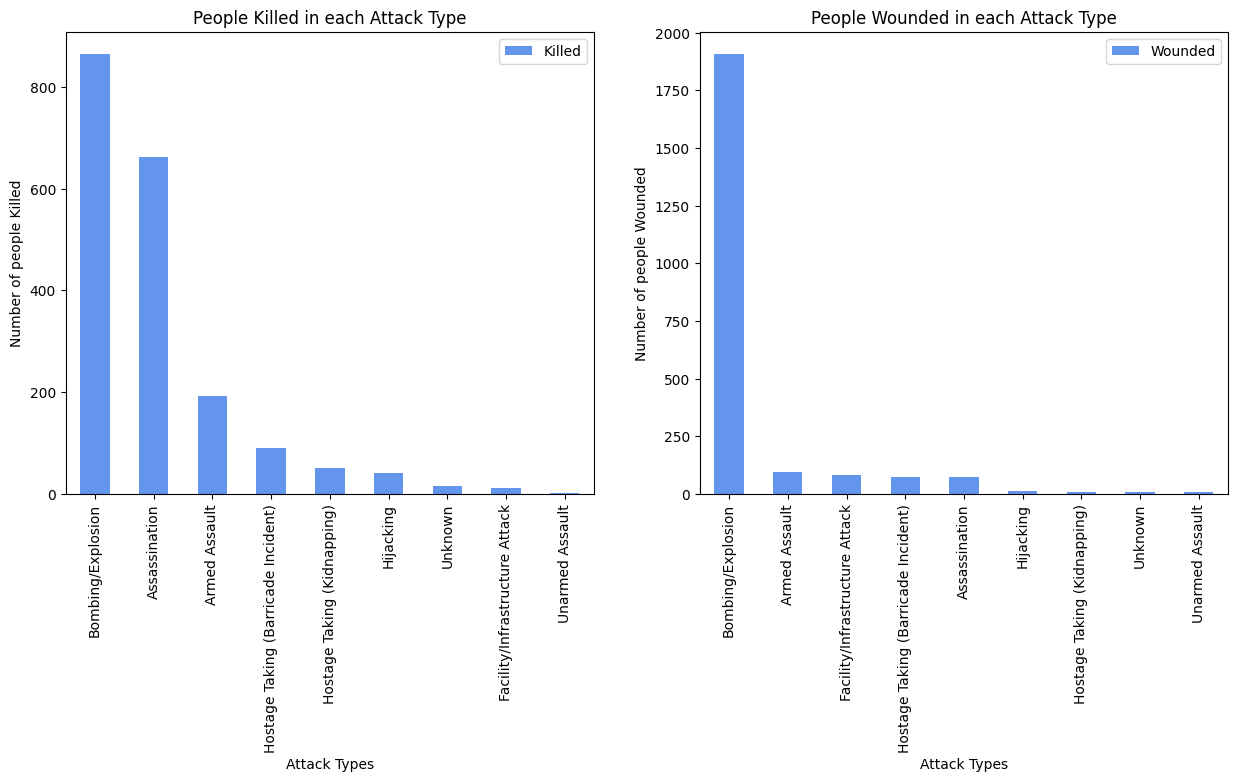

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# 7. Target Type wise Attacks

1. Number of Attacks over each Target Type

In [ ]:
ta=df["Target Type"].value_counts()
ta

Business                          663
Private Citizens & Property       519
Military                          490
Government (Diplomatic)           293
Police                            228
Government (General)              224
Educational Institution           119
Airports & Aircraft               104
Utilities                          55
Terrorists/Non-State Militia       55
Journalists & Media                44
Religious Figures/Institutions     31
Transportation                     21
NGO                                21
Telecommunication                  14
Tourists                           11
Maritime                            8
Unknown                             6
Violent Political Party             5
Other                               4
Food or Water Supply                2
Name: Target Type, dtype: int64

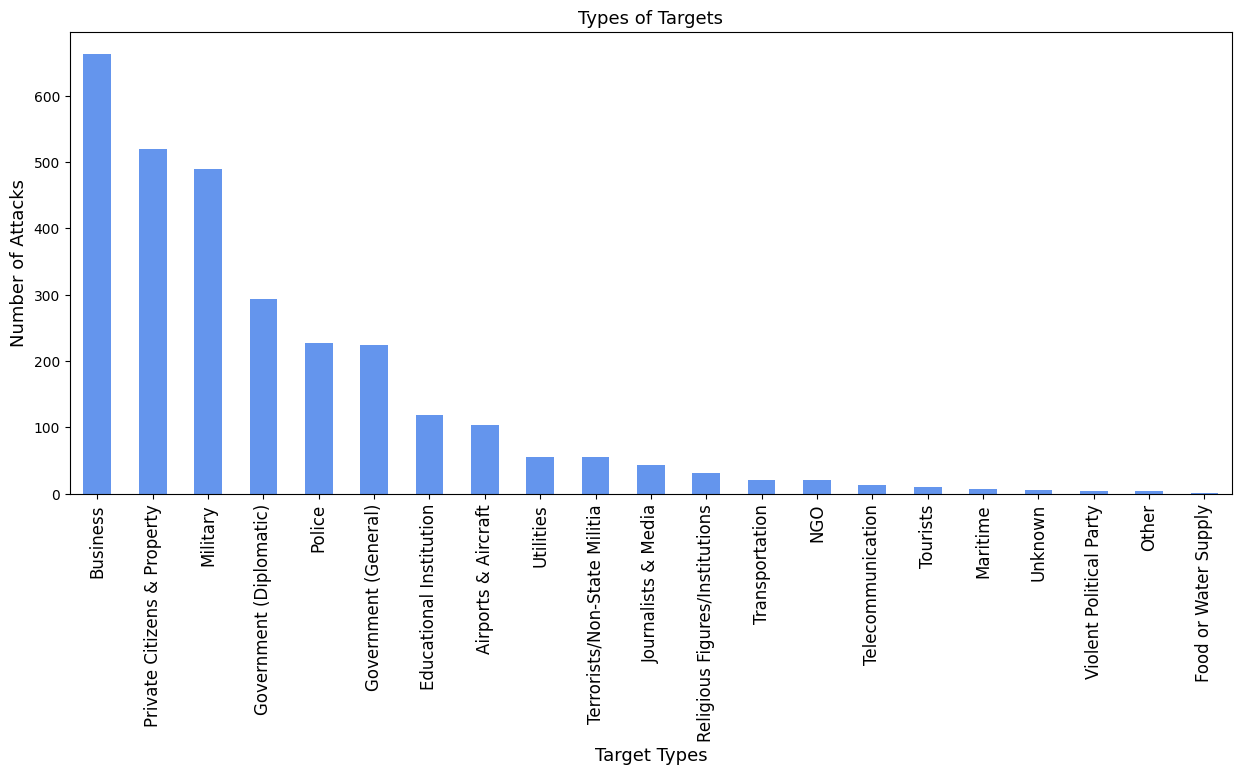

In [ ]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
tc=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
tc

,Casualty
Target Type,
Business,886.0
Private Citizens & Property,742.0
Airports & Aircraft,698.0
Military,490.0
Government (General),470.0
Police,240.0
Transportation,196.0
Government (Diplomatic),157.0
Educational Institution,145.0


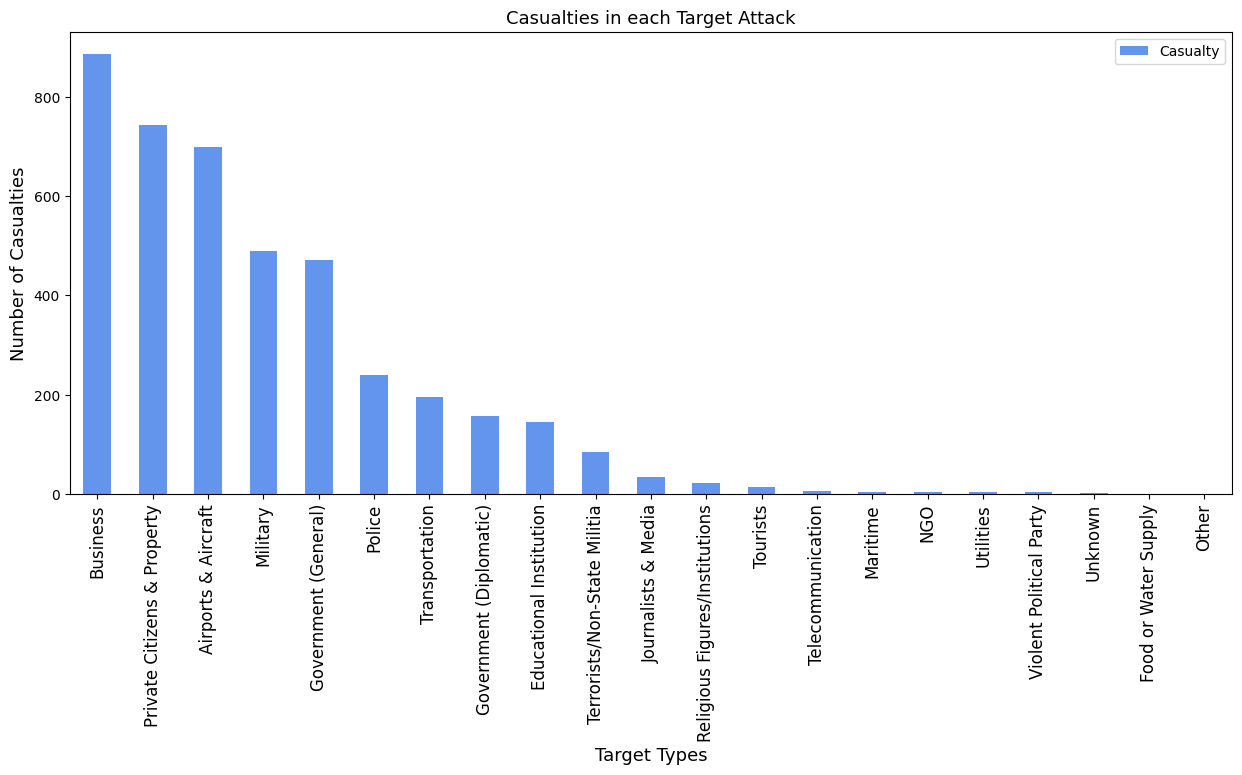

In [ ]:
tc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
tk=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
tk

,Killed
Target Type,
Private Citizens & Property,553.0
Airports & Aircraft,410.0
Military,377.0
Business,183.0
Police,136.0
Terrorists/Non-State Militia,77.0
Government (General),55.0
Transportation,41.0
Government (Diplomatic),37.0


In [ ]:
tw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
tw

,Wounded
Target Type,
Business,703.0
Government (General),415.0
Airports & Aircraft,288.0
Private Citizens & Property,189.0
Transportation,155.0
Government (Diplomatic),120.0
Educational Institution,119.0
Military,113.0
Police,104.0


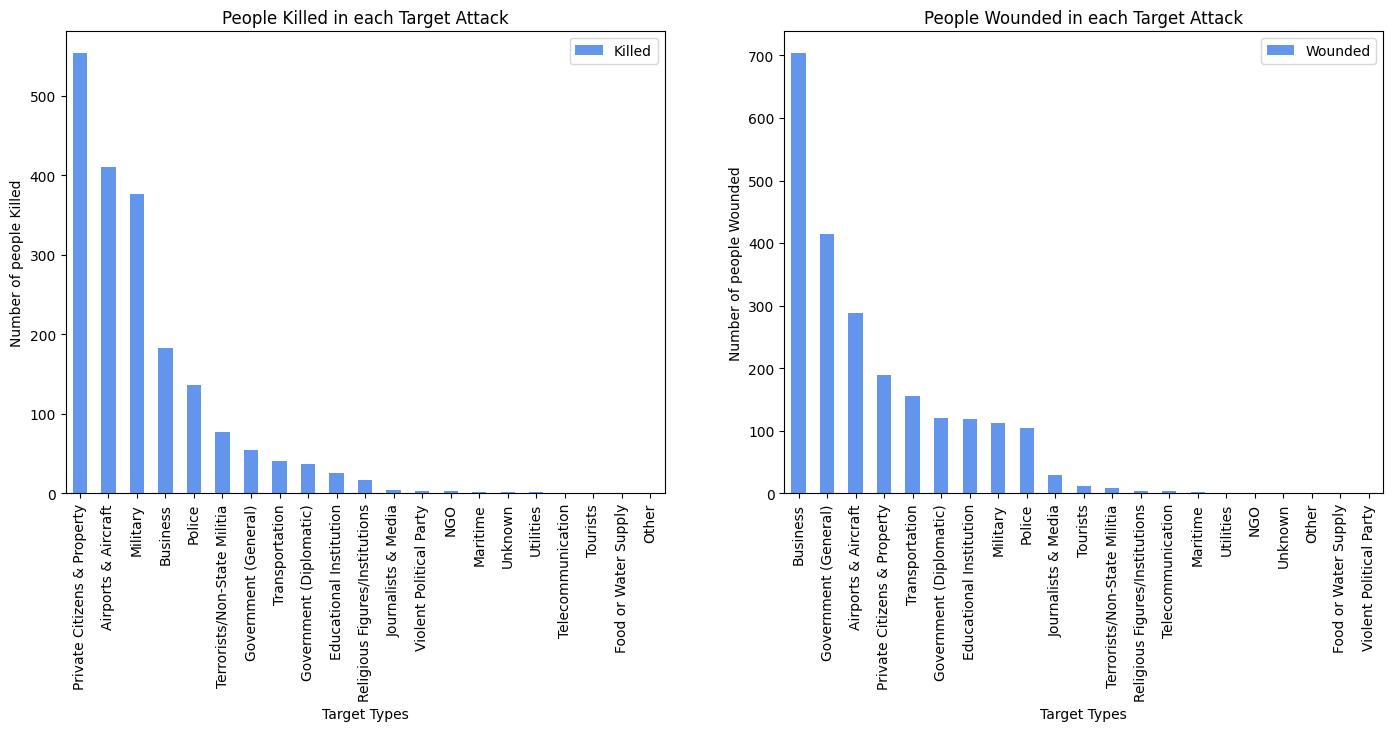

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tw.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# 8. Group + Country wise - Top10

1. Sorting by number of Attacks

In [ ]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

<ipython-input-53-e3f050b9d645>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                            Country       
Irish Republican Army (IRA)                           United Kingdom    455
Left-Wing Militants                                   United States     169
Protestant extremists                                 United Kingdom    118
Ulster Volunteer Force (UVF)                          United Kingdom     87
Black Nationalists                                    United States      82
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)  Argentina          76
Student Radicals                                      United States      71
Ulster Freedom Fighters (UFF)                         United Kingdom     58
Weather Underground, Weathermen                       United States      43
Tupamaros (Uruguay)                                   Uruguay            41
dtype: int64

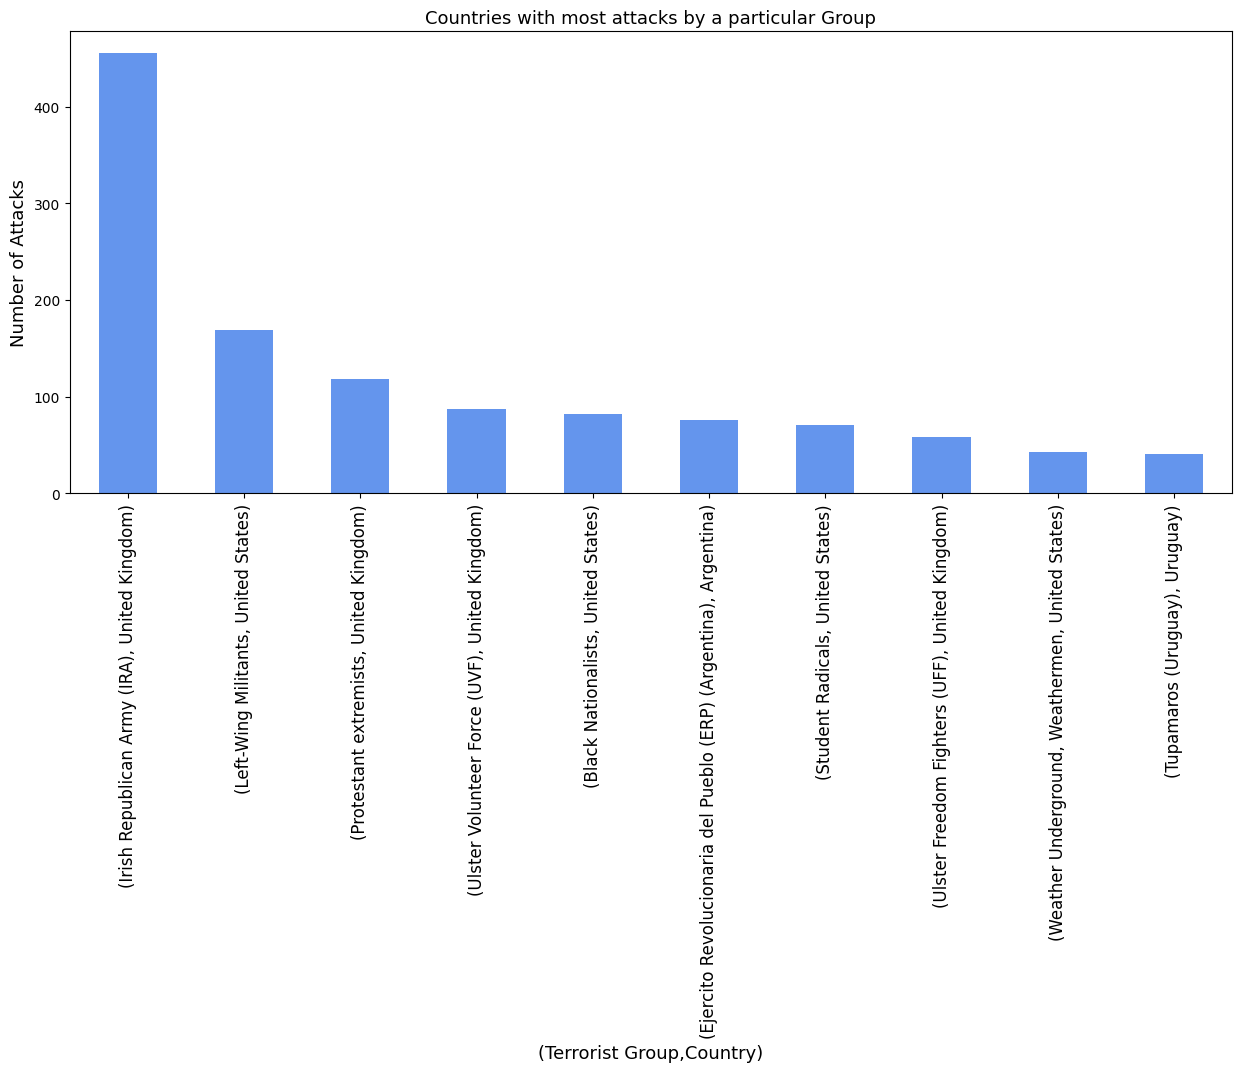

In [ ]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Sorting by Number of Casualties

In [ ]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

<ipython-input-55-eaf64a6f7a91>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


,,Casualty
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,1335.0
Black Order,Italy,170.0
Protestant extremists,United Kingdom,129.0
Maskini Liberation Front,Kenya,127.0
Ulster Volunteer Force (UVF),United Kingdom,120.0
Democratic Front for the Liberation of Palestine (DFLP),Israel,120.0
Japanese Red Army (JRA),Israel,98.0
Basque Fatherland and Freedom (ETA),Spain,95.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",Greece,88.0


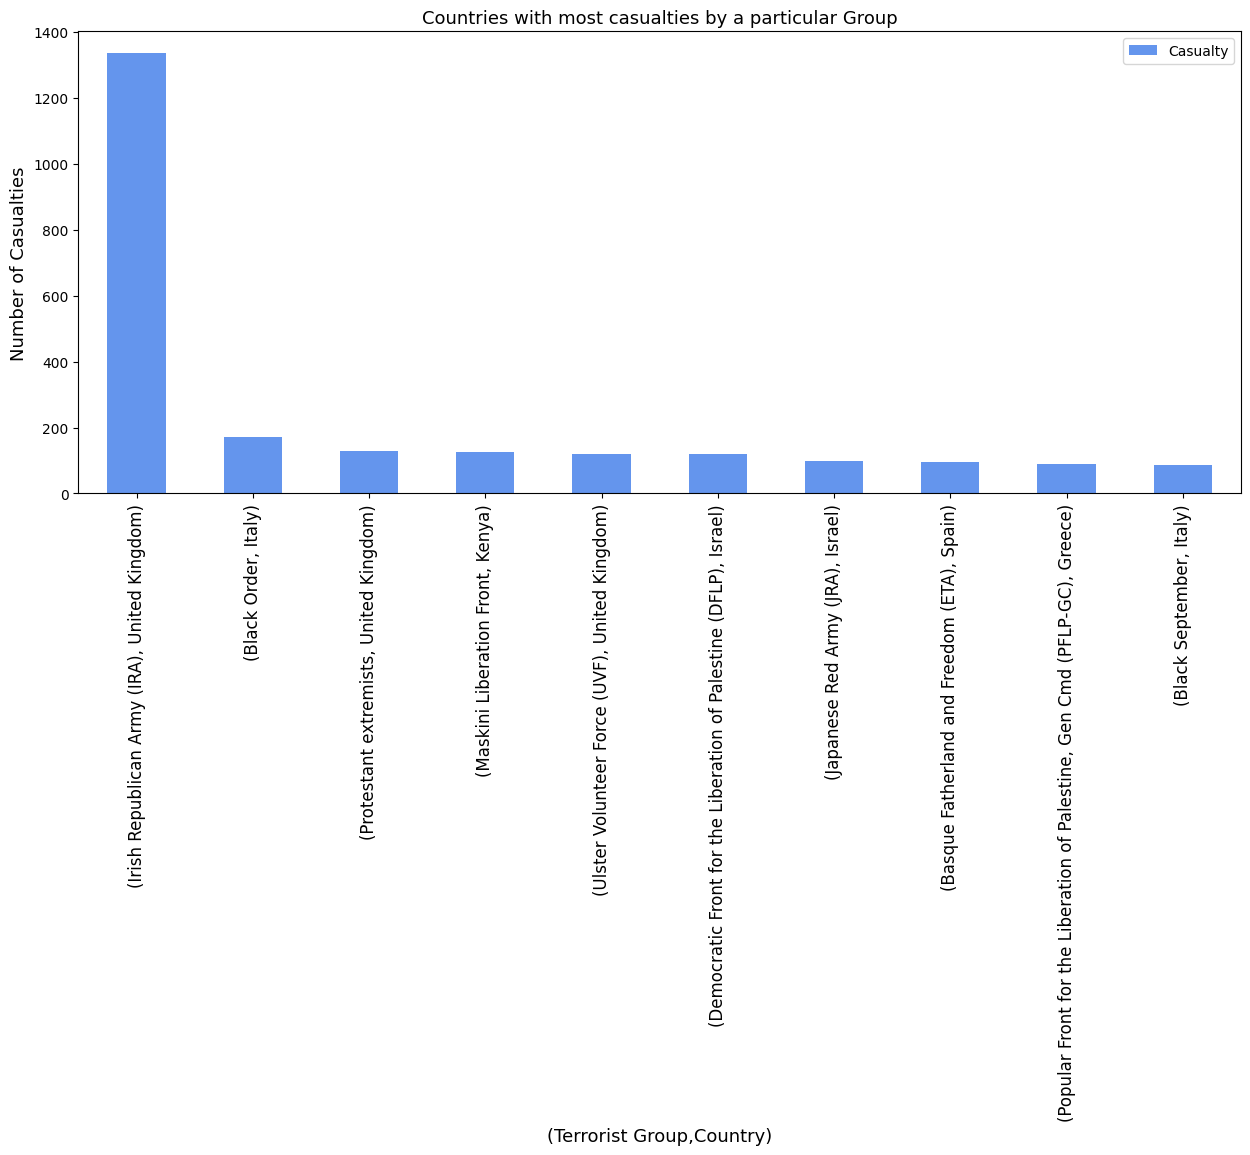

In [ ]:
gcc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Sorting by Number of People Killed

In [ ]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gck

<ipython-input-57-e36c2164dccc>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)


,,Killed
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,578.0
Protestant extremists,United Kingdom,129.0
Ulster Volunteer Force (UVF),United Kingdom,119.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",Greece,88.0
Ulster Freedom Fighters (UFF),United Kingdom,65.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",Switzerland,47.0
Ulster Volunteer Force (UVF),Ireland,36.0
Irish Republican Extremists,United Kingdom,34.0
Official Irish Republican Army (OIRA),United Kingdom,34.0


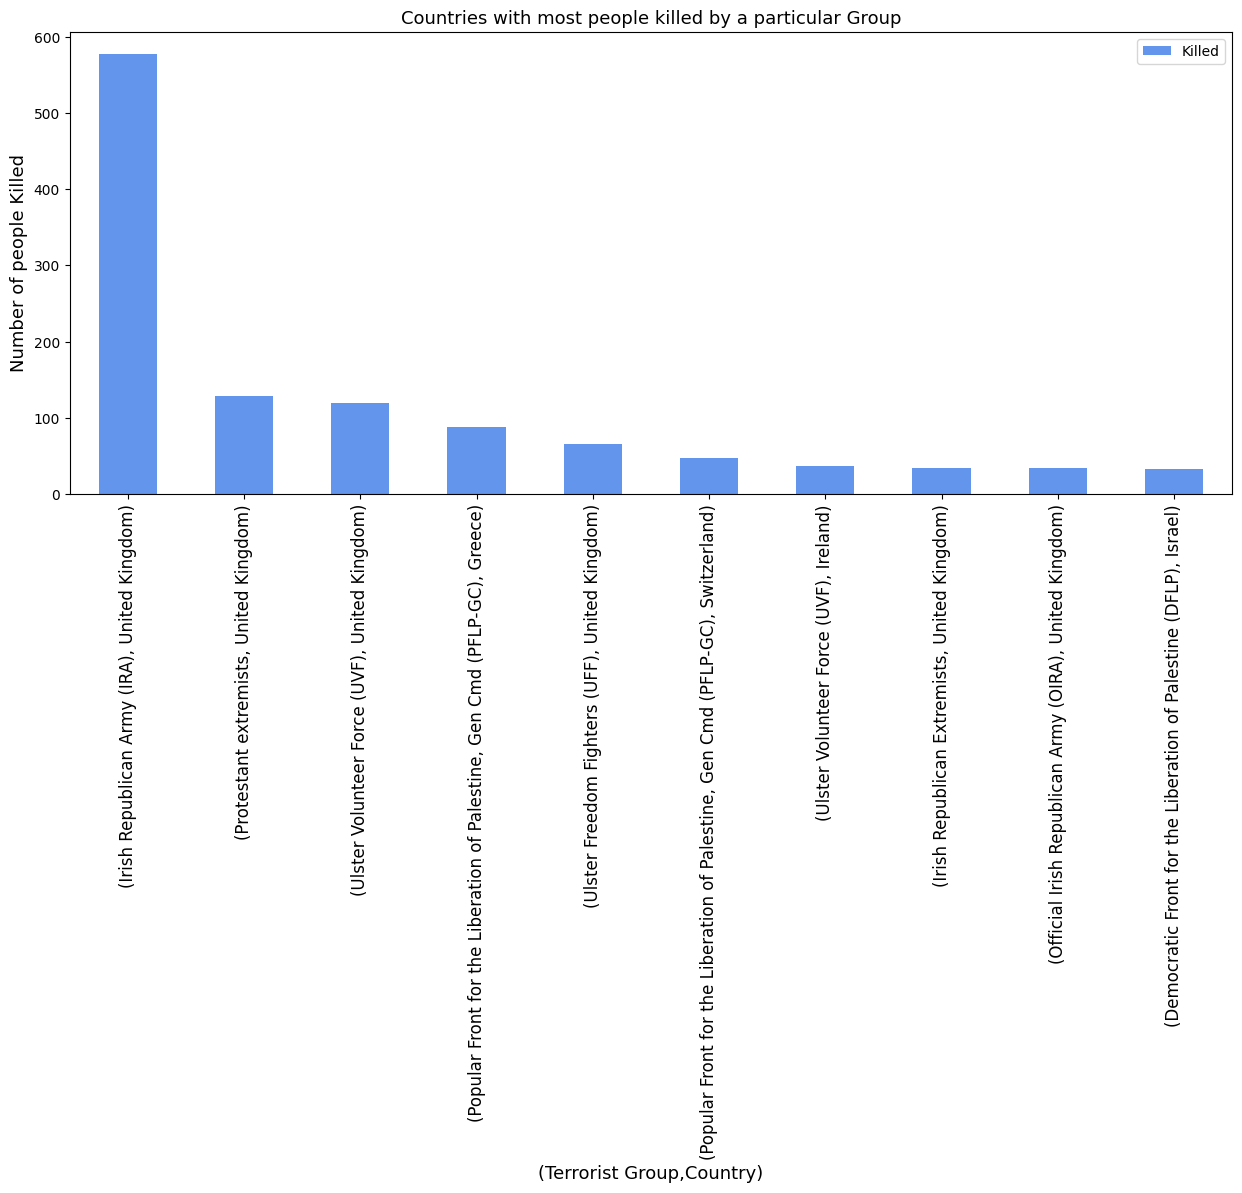

In [ ]:
gck.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

4. Sorting by Number of People Wounded

In [ ]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gcw

<ipython-input-59-c01c65ff58a6>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


,,Wounded
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,757.0
Black Order,Italy,150.0
Maskini Liberation Front,Kenya,100.0
Democratic Front for the Liberation of Palestine (DFLP),Israel,88.0
Japanese Red Army (JRA),Israel,72.0
Basque Fatherland and Freedom (ETA),Spain,71.0
Black Panthers,United States,68.0
Popular Front for the Liberation of Palestine (PFLP),France,59.0
Fuerzas Armadas de Liberacion Nacional (FALN),United States,56.0


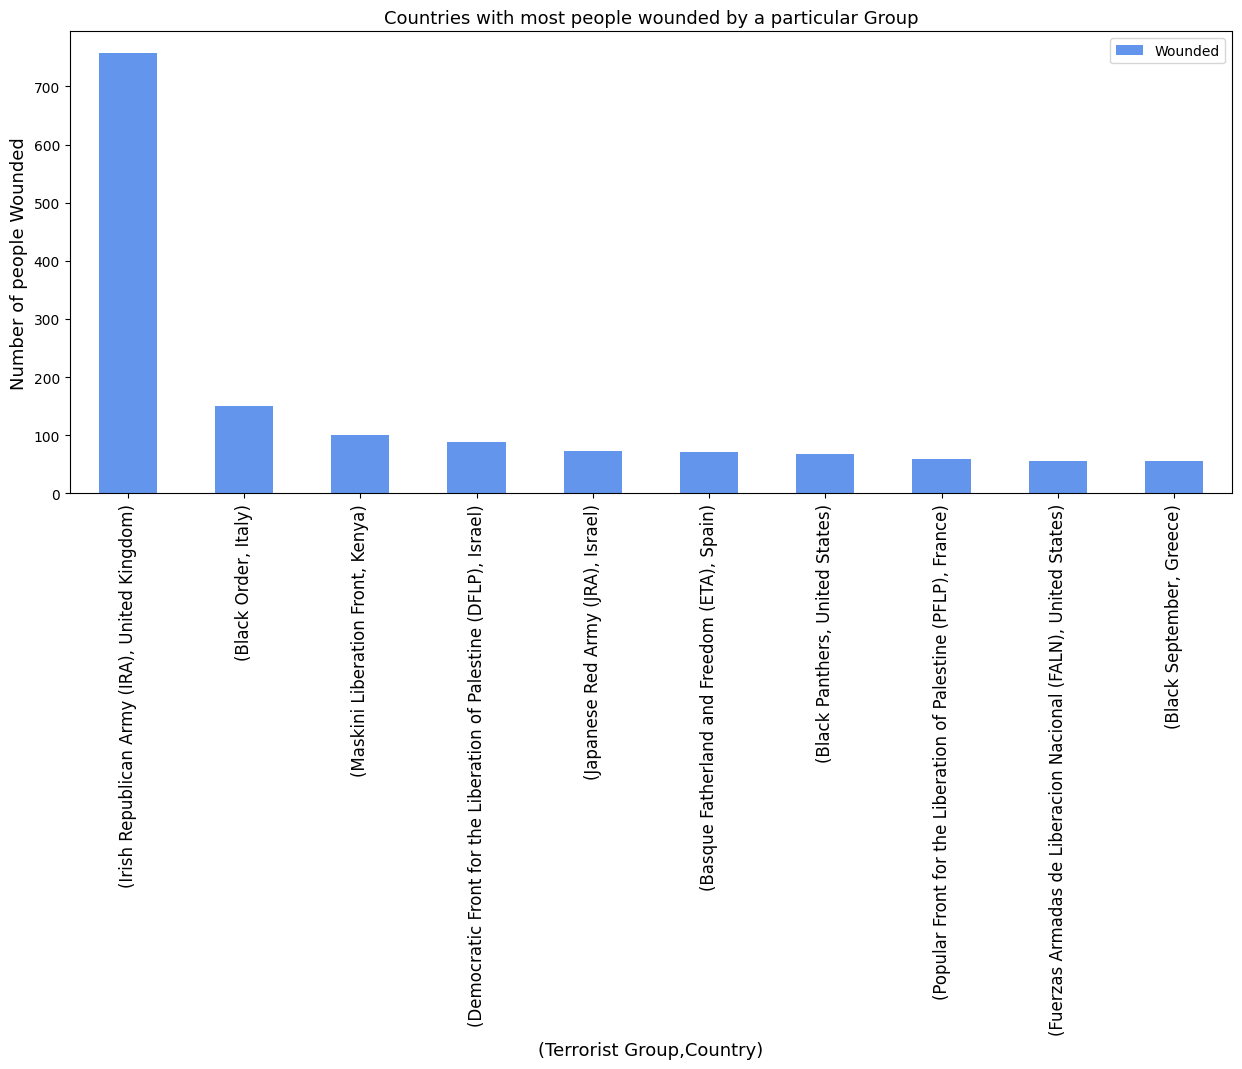

In [ ]:
gcw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

# 9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

1. Total Casualties (Killed + Wounded) due to Terrorist Attack

In [ ]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 4197.0


2. Killed due to Terrorist Attacks

In [ ]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 1930.0


3. Wounded due to Terrorist Attacks

In [ ]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 2267.0


# Observations

1. Year wise Attacks :

  (i) Attacks
  
    (a) Most number of attacks: 16903 in 2014
    
    (b) Least number of attacks: 471 in 1971
    
  (ii) Casualties
  
    (a) Most number of casualties: 85618 in 2014
    
    (b) Least number of casualties: 255 in 1971
    
  (iii) Killed
  
    (a) Most number of people killed: 44490 in 2014
    
    (b) Least number of people killed: 173 in 1971
    
  (iv) Wounded
  
    (a) Most number of people wounded: 44043 in 2015
    
    (b) Least number of people wounded: 82 in 1971

2. Region wise Attacks :

  (i) Attacks
  
    (a) Most number of attacks: 50474 in "Middle East & North Africa"
    
    (b) Least number of attacks: 282 in "Australasia & Oceania"
    
  (ii) Casualties
  
    (a) Most number of casualties: 351950 in "Middle East & North Africa"
    
    (b) Least number of casualties: 410 in Australasia & Oceania
    
  (iii) Killed
  
    (a) Most number of people killed: 137642 in "Middle East & North Africa"
    
    (b) Least number of people killed: 150 in "Australasia & Oceania"
    
  (iv) Wounded
  
    (a) Most number of people wounded: 214308 in "Middle East & North Africa"
    
    (b) Least number of people wounded: 260 in "Australasia & Oceania"

3. Country wise Attacks [Top 10] :

  (i) Attacks
  
    (a) Most number of attacks: 24636 in "Iraq"
    
    (b) Least number of attacks: 4292 in "Turkey"
    
  (ii) Casualties
  
    (a) Most number of casualties: 213279 in "Iraq"
    
    (b) Least number of casualties: 22926 in "Philippines"
    
  (iii) Killed
  
    (a) Most number of people killed: 78589 in "Iraq"
    
    (b) Least number of people killed: 12053 in "El Salvador"
    
  (iv) Wounded
  
    (a) Most number of people wounded: 134690 in "Iraq"
    
    (b) Least number of people wounded: 10328 in "Colombia"

4. City wise Attacks [Top 10] :

  (i) Attacks
  
    (a) Most number of attacks: 7589 in "Baghdad"
    
    (b) Least number of attacks: 1019 in "Athens"
    
  (ii) Casualties
  
    (a) Most number of casualties: 77876 in "Baghdad"
    
    (b) Least number of casualties: 5748 in "Aleppo"
    
  (iii) Killed
  
    (a) Most number of people killed: 21151 in "Baghdad"
    
    (b) Least number of people killed: 2125 in "Aleppo"
    
  (iv) Wounded
  
    (a) Most number of people wounded: 56725 in "Baghdad"
    
    (b) Least number of people wounded: 4955 in "Mogadishu"

5. Terrorist Group wise Attacks [Top 10] :

  (i) Attacks
  
    (a) Most number of attacks : 7478 by "Taliban"
    
    (b) Least number of attacks : 2418 by "Boko Haram"
    
  (ii) Casualties
  
    (a) Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)"
    
    (b) Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)"
    
  (iii) Killed
  
    (a) Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)"
    
    (b) Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)"
    
  (iv) Wounded
  
    (a) Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)"
    
    (b) Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)"

6. Attack Type wise Attacks:

  (i) Attacks
  
    (a) Most number of attacks : 88255 by "Bombing/Explosion"
    
    (b) Least number of attacks : 659 by "Hijacking"
    
  (ii) Casualties
  
    (a) Most number of casualties : 530007 by "Bombing/Explosion"
    
    (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack"
    
  (iii) Killed
  
    (a) Most number of people killed : 160297 by "Armed Assault"
    
    (b) Least number of people killed : 880 by "Unarmed Assault"
    
  (iv) Wounded
  
    (a) Most number of people wounded : 372686 by "Bombing/Explosion"
    
    (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"

7. Target Type wise Attacks:

  (i) Attacks
  
    (a) Most number of attacks : 43511 over "Private Citizens & Property"
    
    (b) Least number of attacks : 263 over "Abortion Related"
    
  (ii) Casualties
  
    (a) Most number of casualties : 319176 over "Private Citizens & Property"
    
    (b) Least number of casualties : 56 over "Abortion Related"
    
  (iii) Killed
  
    (a) Most number of people killed : 140504 over "Private Citizens & Property"
    
    (b) Least number of people killed : 10 over "Abortion Related"
    
  (iv) Wounded
  
    (a) Most number of people wounded : 178672 over "Private Citizens & Property"
    
    (b) Least number of people wounded : 46 over "Abortion Related"

8. Group and Country wise Attacks [Top 10] :

  (i) Attacks
  
    (a) Most number of attacks : 7423 by "Taliban" in "Afghanistan"
    
    (b) Least number of attacks : 2087 by "Boko Haram" in "Nigeria"
    
  (ii) Casualties
  
    (a) Most number of casualties : 57140 by "Taliban" in "Afghanistan"
    
    (b) Least number of casualties : 12068 by "Farabundo Marti National Liberation Front (FMLN)" in "El Salvador"
    
  (iii) Killed
  
    (a) Most number of people killed : 31058 by "Islamic State of Iraq and the Levant (ISIL)" in "Iraq"
    
    (b) Least number of people killed : 6014 by "Tehrik-i-Taliban Pakistan (TTP)" in "Pakistan"
    
  (iv) Wounded
  
    (a) Most number of people wounded : 27871 by "Taliban" in "Afghanistan"
    
    (b) Least number of people wounded : 4795 by "Kurdistan Workers' Party (PKK)" in "Turkey"

9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 :

  (i) Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737
  
  (ii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868
  
  (iii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 523869